In [21]:
import numpy
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize

In [22]:
data_no_wcor_no = numpy.load("non_wcorrected_image_nooutrigger.npz")
data_wcor_no = numpy.load("wcorrected_image_nooutrigger.npz")
data_no_wcor = numpy.load("non_wcorrected_image.npz")
data_wcor = numpy.load("wcorrected_image.npz")

In [23]:
# With Outrigger
image_no_wcor = data_no_wcor['image']
image_wcor = data_wcor['image']

image_no_wcor = numpy.nan_to_num(image_no_wcor.reshape(1,1,4,64,64))
image_wcor = numpy.nan_to_num(image_wcor.reshape(1,1,4,64,64))


# Without Outrigger
image_no_wcor_no = data_no_wcor_no['image']
image_wcor_no = data_wcor_no['image']

image_no_wcor_no = numpy.nan_to_num(image_no_wcor_no.reshape(1,1,4,64,64))
image_wcor_no = numpy.nan_to_num(image_wcor_no.reshape(1,1,4,64,64))

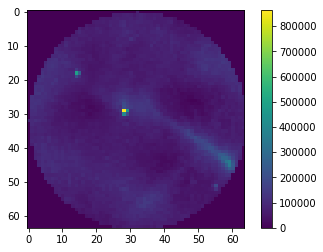

In [24]:
plt.imshow(image_wcor[0,0,0,:,:].real)
plt.colorbar()
plt.show()

In [25]:
peak_x = numpy.max(image_wcor[0,0,0,:,:])
peak_y = numpy.max(image_wcor[0,0,3,:,:])

In [26]:
## X Polarisation
# With Outrigger
image_wcor_x = image_wcor[0,0,0,:,:]/peak_x
image_no_wcor_x = image_no_wcor[0,0,0,:,:]/peak_x

image_wcor_y = image_wcor[0,0,3,:,:]/peak_y
image_no_wcor_y = image_no_wcor[0,0,3,:,:]/peak_y

# Without Outrigger

image_wcor_no_x = image_wcor_no[0,0,0,:,:]/peak_x
image_no_wcor_no_x = image_no_wcor_no[0,0,0,:,:]/peak_x

image_wcor_no_y = image_wcor_no[0,0,3,:,:]/peak_y
image_no_wcor_no_y = image_no_wcor_no[0,0,3,:,:]/peak_y

In [27]:
# With Outrigger
diff_x = numpy.nan_to_num(numpy.abs(image_wcor_x - image_no_wcor_x))
diff_y = numpy.nan_to_num(numpy.abs(image_wcor_y - image_no_wcor_y))

# Without Outrigger
diff_x_no = numpy.nan_to_num(numpy.abs(image_wcor_no_x - image_no_wcor_no_x))
diff_y_no = numpy.nan_to_num(numpy.abs(image_wcor_no_y - image_no_wcor_no_y))

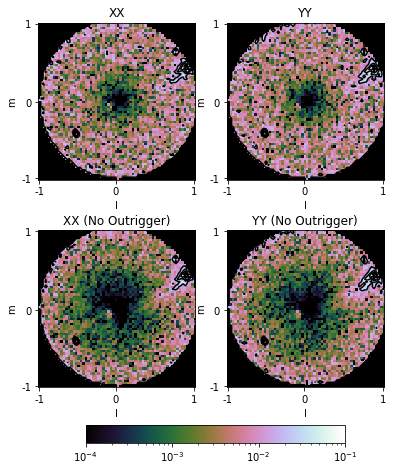

In [66]:
fig = plt.figure(figsize=(6,7))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


tick_locs = [0,31,63]
tick_names = [-1,0,1]

levels=numpy.arange(0.0,1.0,0.02)


s1 = ax1.imshow(diff_x+1e-10,cmap=plt.get_cmap('cubehelix'),norm=LogNorm(vmin=0.0001, vmax=0.1),origin='lower')
ax1.contour(diff_x, colors='k', origin='lower',levels=levels)
ax1.set_xticks(tick_locs)
ax1.set_xlabel('l')
ax1.set_yticks(tick_locs)
ax1.set_ylabel('m')
ax1.set_xticklabels(tick_names)
ax1.set_yticklabels(tick_names)
ax1.set_title("XX")

ax2.imshow(diff_y+1e-10,cmap=plt.get_cmap('cubehelix'),norm=LogNorm(vmin=0.0001, vmax=0.1),origin='lower')
ax2.contour(diff_y, colors='k', origin='lower',levels=levels)
ax2.set_xticks(tick_locs)
ax2.set_xlabel('l')
ax2.set_yticks(tick_locs)
ax2.set_ylabel('m')
ax2.set_xticklabels(tick_names)
ax2.set_yticklabels(tick_names)
ax2.set_title("YY")

ax3.imshow(diff_x_no+1e-10,cmap=plt.get_cmap('cubehelix'),norm=LogNorm(vmin=0.0001, vmax=0.1),origin='lower')
ax3.contour(diff_x_no, colors='k', origin='lower',levels=levels)
ax3.set_xticks(tick_locs)
ax3.set_xlabel('l')
ax3.set_yticks(tick_locs)
ax3.set_ylabel('m')
ax3.set_xticklabels(tick_names)
ax3.set_yticklabels(tick_names)
ax3.set_title("XX (No Outrigger)")

ax4.imshow(diff_y_no+1e-10,cmap=plt.get_cmap('cubehelix'),norm=LogNorm(vmin=0.0001, vmax=0.1),origin='lower')
ax4.contour(diff_y_no, colors='k', origin='lower',levels=levels)
ax4.set_xticks(tick_locs)
ax4.set_xlabel('l')
ax4.set_yticks(tick_locs)
ax4.set_ylabel('m')
ax4.set_xticklabels(tick_names)
ax4.set_yticklabels(tick_names)
ax4.set_title("YY (No Outrigger)")

cax = fig.add_axes([0.21, 0.03, 0.6, 0.035])
fig.colorbar(s1, cax=cax, orientation='horizontal')
plt.subplots_adjust(left=0.1, bottom=None, right=None, top=None, wspace=None, hspace=None)
#plt.tight_layout()
plt.savefig('diff_dft_wcor.pdf')

plt.show()

# Plot Good DFT Image for paper..

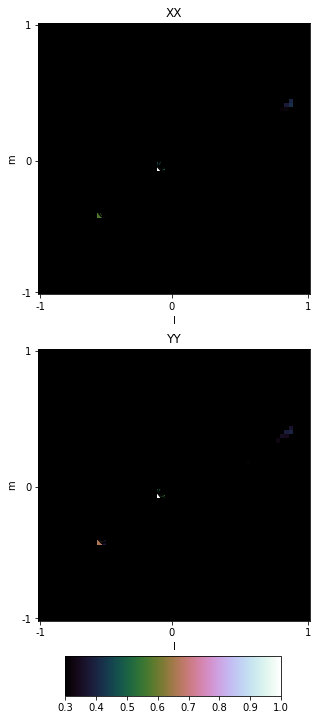

In [19]:
fig = plt.figure(figsize=(5,11))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


tick_locs = [0,31,63]
tick_names = [-1,0,1]
levels=numpy.arange(0.0,1.0,0.25)

s1 = ax1.imshow(image_wcor_x.real,cmap=plt.get_cmap('cubehelix'),norm=Normalize(vmin=0.3,vmax=1),origin='lower')
ax1.contour(image_wcor_x.real, colors='k', origin='lower',levels=levels)
ax1.set_xticks(tick_locs)
ax1.set_xlabel('l')
ax1.set_yticks(tick_locs)
ax1.set_ylabel('m')
ax1.set_xticklabels(tick_names)
ax1.set_yticklabels(tick_names)
ax1.set_title("XX")

ax2.imshow(image_wcor_y.real,cmap=plt.get_cmap('cubehelix'),norm=Normalize(vmin=0.3,vmax=1),origin='lower')
ax2.contour(image_wcor_y.real, colors='k', origin='lower',levels=levels)
ax2.set_xticks(tick_locs)
ax2.set_xlabel('l')
ax2.set_yticks(tick_locs)
ax2.set_ylabel('m')
ax2.set_xticklabels(tick_names)
ax2.set_yticklabels(tick_names)
ax2.set_title("YY")

cax = fig.add_axes([0.21, 0.03, 0.6, 0.05])
fig.colorbar(s1, cax=cax, orientation='horizontal')

plt.savefig('dft_image.pdf')
plt.show()

#### 